In [60]:
import torch
import torch.nn as nn
import torch.optim as optim 
import torchvision
from torchvision import transforms , datasets
from torch.utils.data import DataLoader , dataset
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [61]:
transform =transforms.Compose([transforms.ToTensor()])


In [62]:
train_data = datasets.MNIST("./data" , train= True , download= True , transform=transform)
test_data = datasets.MNIST("./data" , train= False , download= True , transform= transform)

In [63]:
train_loader = DataLoader(train_data , batch_size= 20 , shuffle= True)
test_loader = DataLoader(test_data , batch_size= 20 , shuffle= True)

In [64]:
print(len(train_loader))
print(len(test_loader))

3000
500


In [65]:
for data in train_loader :
    print(len(data))
    break

2


In [66]:
data[0][0].shape

torch.Size([1, 28, 28])

In [67]:
data[1]

tensor([2, 2, 5, 1, 3, 9, 4, 0, 6, 6, 4, 2, 0, 9, 1, 7, 6, 9, 7, 6])

In [68]:
for data_1 in test_loader:
    print(len(data_1))
    break

2


In [69]:
data_1[0][0].shape

torch.Size([1, 28, 28])

In [70]:
X , y = data[0][0] , data[1][0]

print(X)
print(y)


print(X.shape)
print(y.shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

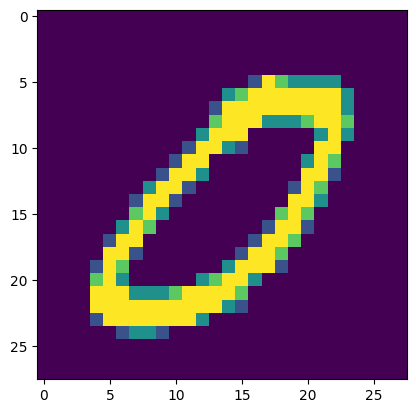

tensor(0)


In [71]:
plt.imshow(data[0][7].view(28 , 28))
plt.show()

print(data[1][7])

In [72]:
total = 0 
count_dict = {0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0 }

for data in train_loader :
    xc , yc = data 
    for y in yc:
        count_dict[int(y)] +=1
        total +=1


print(total)
print(count_dict)

60000
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [73]:
for i in count_dict:
    print(f"{i} : {count_dict[i] / total * 100}")

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [74]:
def train(loader , model , crterion , optimiser , device):
    loss_pre_epoch = []
    acc_pre_epoch = []

    for data , label in loader:
        optimiser.zero_grad()
        data = data.to(device)
        label = label.to(device)
        pred =model(data)
        loss = crterion(pred , label)
        loss.backward()
        optimiser.step()
        acc = accuracy_score(label.detach().cpu() , pred.argmax(dim =1).detach().cpu())
        acc_pre_epoch.append(acc)
        loss_pre_epoch.append(loss.item())

        return torch.mean(torch.tensor(loss_pre_epoch)), torch.mean(torch.tensor(acc_pre_epoch))
    
    

In [75]:
def test(loader , model , criterion , device):
    loss_pre_epoch = []
    acc_pre_epoch = []

    with torch.no_grad():
        for data , label in loader:
            data = data.to(device)
            label = label.to(device)
            pred = model(data)
    
            loss = criterion(pred , label)
            acc = accuracy_score(label.detach().cpu() , pred.argmax(dim=1).detach().cpu())
            acc_pre_epoch.append(acc)
            loss_pre_epoch.append(loss.item())
            
    return torch.mean(torch.tensor(loss_pre_epoch)) , torch.mean(torch.tensor(acc_pre_epoch))
        

In [85]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN , self).__init__()
        self.fc1 = nn.Linear(28*28 , 128)
        self.fc2 = nn.Linear(128 , 64)
        self.fc3 = nn.Linear(64 , 10)
        self.relu = nn.ReLU()
        self.relu1 = nn.ReLU()


    def forward(self , x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu1(x)
        x = self.fc3(x)
        return x
    



In [86]:
model = ANN()
criterion = nn.CrossEntropyLoss()
device = "cpu"
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
train_loss_per_epoch = []
test_loss_per_epoch = []
train_acc_per_epoch = []
test_acc_per_epoch = []

for epoch in range(10):
    train_loss , train_acc = train(train_loader , model , criterion , optimizer , device)
    train_loss_per_epoch.append(train_loss)
    train_acc_per_epoch.append(train_acc)
    test_loss , test_acc = test(test_loader , model , criterion , device )
    test_acc_per_epoch.append(test_acc)
    test_loss_per_epoch.append(test_acc)
    print(f"Epoch {epoch} /10: Train_loss: {train_loss}, Train_acc: {train_acc} ,Test_loss: {test_loss} ,Test_acc: {test_acc}")


Epoch 0 /10: Train_loss: 2.3235714435577393, Train_acc: 0.05000000074505806 ,Test_loss: 2.262993335723877 ,Test_acc: 0.1777999848127365
Epoch 1 /10: Train_loss: 2.1979470252990723, Train_acc: 0.25 ,Test_loss: 2.2925174236297607 ,Test_acc: 0.09619999676942825
Epoch 2 /10: Train_loss: 2.306241273880005, Train_acc: 0.10000000149011612 ,Test_loss: 2.1358842849731445 ,Test_acc: 0.2939999997615814
Epoch 3 /10: Train_loss: 1.9926121234893799, Train_acc: 0.30000001192092896 ,Test_loss: 2.126599073410034 ,Test_acc: 0.23770000040531158
Epoch 4 /10: Train_loss: 2.0526390075683594, Train_acc: 0.4000000059604645 ,Test_loss: 2.146981716156006 ,Test_acc: 0.29109999537467957
Epoch 5 /10: Train_loss: 1.9769363403320312, Train_acc: 0.3499999940395355 ,Test_loss: 2.0690243244171143 ,Test_acc: 0.32750004529953003
Epoch 6 /10: Train_loss: 1.8914858102798462, Train_acc: 0.3499999940395355 ,Test_loss: 1.9103840589523315 ,Test_acc: 0.3493000268936157
Epoch 7 /10: Train_loss: 1.6728713512420654, Train_acc: 0.5

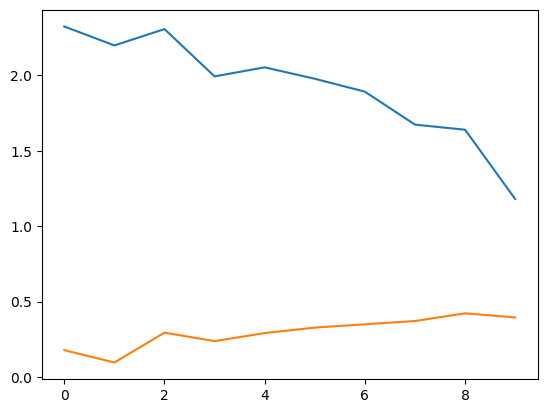

In [87]:
plt.plot(train_loss_per_epoch)
plt.plot(test_loss_per_epoch)

In [82]:
class ANN_2(nn.Module):
    def __init__(self):
        super(ANN_2 , self).__init__()
        self.fc1 = nn.Linear(28 * 28 , 512)
        self.fc2 = nn.Linear(512 , 512)
        self.fc3 = nn.Linear(512 , 10)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.relu1 = nn.ReLU()

        

    def forward(self , x):
        x = x.view(x.size(0) , -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [88]:
model = ANN_2()
criterion = nn.CrossEntropyLoss()
device = "cpu"
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
train_loss_per_epoch = []
test_loss_per_epoch = []
train_acc_per_epoch = []
test_acc_per_epoch = []

for epoch in range(50):
    train_loss , train_acc = train(train_loader , model , criterion , optimizer , device)
    train_loss_per_epoch.append(train_loss)
    train_acc_per_epoch.append(train_acc)
    test_loss , test_acc = test(test_loader , model , criterion , device )
    test_acc_per_epoch.append(test_acc)
    test_loss_per_epoch.append(test_acc)
    print(f"Epoch {epoch} /10: Train_loss: {train_loss}, Train_acc: {train_acc} ,Test_loss: {test_loss} ,Test_acc: {test_acc}")

Epoch 0 /10: Train_loss: 2.293034076690674, Train_acc: 0.15000000596046448 ,Test_loss: 3.1699774265289307 ,Test_acc: 0.11309999227523804
Epoch 1 /10: Train_loss: 3.9822731018066406, Train_acc: 0.0 ,Test_loss: 2.835468053817749 ,Test_acc: 0.15060001611709595
Epoch 2 /10: Train_loss: 2.6611998081207275, Train_acc: 0.15000000596046448 ,Test_loss: 2.3113455772399902 ,Test_acc: 0.20329998433589935
Epoch 3 /10: Train_loss: 1.9567104578018188, Train_acc: 0.25 ,Test_loss: 2.1548285484313965 ,Test_acc: 0.274399995803833
Epoch 4 /10: Train_loss: 2.0727698802948, Train_acc: 0.30000001192092896 ,Test_loss: 2.0533363819122314 ,Test_acc: 0.3386000096797943
Epoch 5 /10: Train_loss: 1.9591169357299805, Train_acc: 0.4000000059604645 ,Test_loss: 1.9077848196029663 ,Test_acc: 0.367900013923645
Epoch 6 /10: Train_loss: 1.8309812545776367, Train_acc: 0.4000000059604645 ,Test_loss: 1.7932095527648926 ,Test_acc: 0.3564999997615814
Epoch 7 /10: Train_loss: 1.7952196598052979, Train_acc: 0.3499999940395355 ,Te

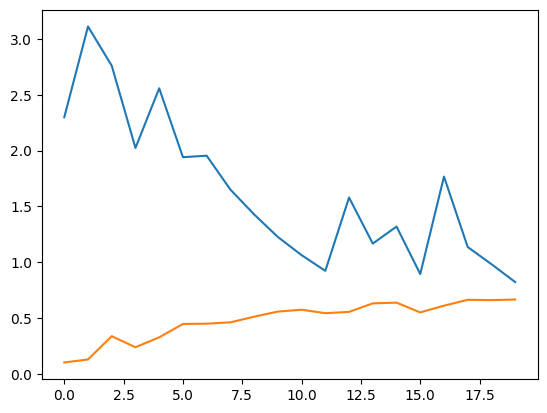

In [84]:
plt.plot(train_loss_per_epoch)
plt.plot(test_loss_per_epoch)